In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For the choropleth 
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls 

# For the SIR Model 
from scipy.integrate import odeint 

%matplotlib inline

In [2]:
df = pd.read_csv("csse_covid_19_time_series/data/time_series_covid19_deaths_US.csv",index_col = 'Province_State')

In [3]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Country_Region,Lat,Long_,Combined_Key,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,AS,ASM,16,60.0,NaN,US,-14.2710,-170.1320,"American Samoa, US",...,0,0,0,0,0,0,0,0,0,0
Guam,316,GU,GUM,316,66.0,NaN,US,13.4443,144.7937,"Guam, US",...,5,5,5,5,5,5,5,5,5,5
Northern Mariana Islands,580,MP,MNP,580,69.0,NaN,US,15.0979,145.6739,"Northern Mariana Islands, US",...,2,2,2,2,2,2,2,2,2,2
Puerto Rico,630,PR,PRI,630,72.0,NaN,US,18.2208,-66.5901,"Puerto Rico, US",...,123,124,124,125,126,126,127,127,129,129
Virgin Islands,850,VI,VIR,850,78.0,NaN,US,18.3358,-64.8963,"Virgin Islands, US",...,6,6,6,6,6,6,6,6,6,6


In [5]:
df.isna().sum().head()

UID       0
iso2      0
iso3      0
code3     0
FIPS     10
dtype: int64

In [6]:
df['FIPS'].unique()

array([6.0000e+01, 6.6000e+01, 6.9000e+01, ..., 9.0055e+04, 9.0056e+04,
       9.9999e+04])

In [7]:
#Since, the FIPS column is of no use for inference. We can Drop it.
df2 = df.drop(['FIPS'],axis=1)
df3 = df2.drop(['Admin2'],axis=1)
df4 = df3.drop(['UID'],axis=1)
df5 = df4.drop(['code3'],axis=1)

In [8]:
drop_rows = ["iso3", "iso2", "Combined_Key", "Country_Region", "Lat", "Long_"]               # Removing useless columns, such as province codes
ht_df = df5.drop(drop_rows, axis = 1)
ht_df.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,55641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guam,164229,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
Northern Mariana Islands,55144,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Puerto Rico,2933408,0,0,0,0,0,0,0,0,0,...,123,124,124,125,126,126,127,127,129,129
Virgin Islands,107268,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Grouper
from datetime import datetime, timedelta
from math import sqrt

NYdata_raw = ht_df.loc["New York"]
NYdata_raw.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
Province_State,,,,,,,,,,,,,,,,,,,,,
New York,305506,0,0,0,0,0,0,0,0,0,...,68,68,69,69,69,69,76,76,76,76
New York,46091,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New York,1418207,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New York,190488,0,0,0,0,0,0,0,0,0,...,28,28,30,30,30,30,32,32,44,44
New York,76117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
NYdata_raw.loc['Total']= NYdata_raw.sum()

/Users/scarlett/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
NYdata_raw.tail()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
Province_State,,,,,,,,,,,,,,,,,,,,,
New York,39859,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
New York,24913,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,6,6
New York,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New York,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Total,26161672,0,0,0,0,0,0,0,0,0,...,28232,28339,28558,28636,28743,28853,29031,29141,29229,29302


In [12]:
NYdata = NYdata_raw.loc['Total']
NYdata

Population    26161672
1/22/20              0
1/23/20              0
1/24/20              0
1/25/20              0
1/26/20              0
1/27/20              0
1/28/20              0
1/29/20              0
1/30/20              0
1/31/20              0
2/1/20               0
2/2/20               0
2/3/20               0
2/4/20               0
2/5/20               0
2/6/20               0
2/7/20               0
2/8/20               0
2/9/20               0
2/10/20              0
2/11/20              0
2/12/20              0
2/13/20              0
2/14/20              0
2/15/20              0
2/16/20              0
2/17/20              0
2/18/20              0
2/19/20              0
                ...   
4/27/20          22668
4/28/20          22912
4/29/20          23477
4/30/20          23587
5/1/20           24039
5/2/20           24198
5/3/20           24708
5/4/20           24999
5/5/20           25124
5/6/20           25623
5/7/20           26144
5/8/20           26243
5/9/20     

In [13]:

# data of the week before the lockdown that is from 12th march to 19th march

# lockdown_date = datetime.strptime("2020-03-20", "%Y-%m-%d").date()
lockdown_date = pd.Timestamp("3/20/20")

#date after three weeks of lockdown 
# a_lockdown_begindate = lockdown_date + timedelta(days=14)
# a_lockdown_enddate = lockdown_date + timedelta(days=21)
# lockdown_begindate = lockdown_date + timedelta(days=0)
# lockafter2_begindate = lockdown_date + timedelta(days=21)
# lockafter2_enddate = lockdown_date + timedelta(days=28)
# lockafter3_begindate = lockdown_date + timedelta(days=28)
# lockafter3_enddate = lockdown_date + timedelta(days=35)

before_ld = NYdata.loc['3/5/20':'3/20/20']
print(before_ld)

lock_d1 = NYdata.loc['3/20/20':'4/3/20']
print(lock_d1)

lock_d2 = NYdata.loc['4/3/20':'4/10/20']
print(lock_d2)

lock_d3 = NYdata.loc['4/10/20':'4/17/20']
print(lock_d3)

lock_d4 = NYdata.loc['4/17/20':'4/24/20']
print(lock_d4)

3/5/20       0
3/6/20       0
3/7/20       0
3/8/20       0
3/9/20       0
3/10/20      0
3/11/20      0
3/12/20      1
3/13/20      2
3/14/20      6
3/15/20     12
3/16/20     24
3/17/20     38
3/18/20     63
3/19/20     96
3/20/20    151
Name: Total, dtype: int64
3/20/20     151
3/21/20     195
3/22/20     286
3/23/20     387
3/24/20     512
3/25/20     659
3/26/20     902
3/27/20    1211
3/28/20    1588
3/29/20    2016
3/30/20    2556
3/31/20    3207
4/1/20     3917
4/2/20     4730
4/3/20     5418
Name: Total, dtype: int64
4/3/20      5418
4/4/20      5991
4/5/20      6785
4/6/20      7809
4/7/20      8886
4/8/20      9834
4/9/20     10778
4/10/20    11605
Name: Total, dtype: int64
4/10/20    11605
4/11/20    12498
4/12/20    13442
4/13/20    14390
4/14/20    15261
4/15/20    16013
4/16/20    16729
4/17/20    17755
Name: Total, dtype: int64
4/17/20    17755
4/18/20    18760
4/19/20    18582
4/20/20    19176
4/21/20    19746
4/22/20    20203
4/23/20    20743
4/24/20    20955
Name: To

In [29]:
before_ld_d = before_ld.diff().fillna(0)
before_ld_d

3/5/20      0.0
3/6/20      0.0
3/7/20      0.0
3/8/20      0.0
3/9/20      0.0
3/10/20     0.0
3/11/20     0.0
3/12/20     1.0
3/13/20     1.0
3/14/20     4.0
3/15/20     6.0
3/16/20    12.0
3/17/20    14.0
3/18/20    25.0
3/19/20    33.0
3/20/20    55.0
Name: Total, dtype: float64

In [31]:
lock_d1_d = lock_d1.diff().fillna(0)
lock_d1_d['3/20/20'] = 55.0
lock_d1_d 

3/20/20     55.0
3/21/20     44.0
3/22/20     91.0
3/23/20    101.0
3/24/20    125.0
3/25/20    147.0
3/26/20    243.0
3/27/20    309.0
3/28/20    377.0
3/29/20    428.0
3/30/20    540.0
3/31/20    651.0
4/1/20     710.0
4/2/20     813.0
4/3/20     688.0
Name: Total, dtype: float64

In [32]:
lock_d2_d = lock_d2.diff().fillna(0)
lock_d2_d['4/3/20'] = 688.0
lock_d2_d 

4/3/20      688.0
4/4/20      573.0
4/5/20      794.0
4/6/20     1024.0
4/7/20     1077.0
4/8/20      948.0
4/9/20      944.0
4/10/20     827.0
Name: Total, dtype: float64

In [33]:
lock_d3_d = lock_d3.diff().fillna(0)
lock_d3_d['4/10/20'] = 827.0
lock_d3_d 

4/10/20     827.0
4/11/20     893.0
4/12/20     944.0
4/13/20     948.0
4/14/20     871.0
4/15/20     752.0
4/16/20     716.0
4/17/20    1026.0
Name: Total, dtype: float64

In [34]:
lock_d4_d = lock_d4.diff().fillna(0)
lock_d4_d['4/17/20'] = 1026.0
lock_d4_d 

4/17/20    1026.0
4/18/20    1005.0
4/19/20    -178.0
4/20/20     594.0
4/21/20     570.0
4/22/20     457.0
4/23/20     540.0
4/24/20     212.0
Name: Total, dtype: float64

In [19]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

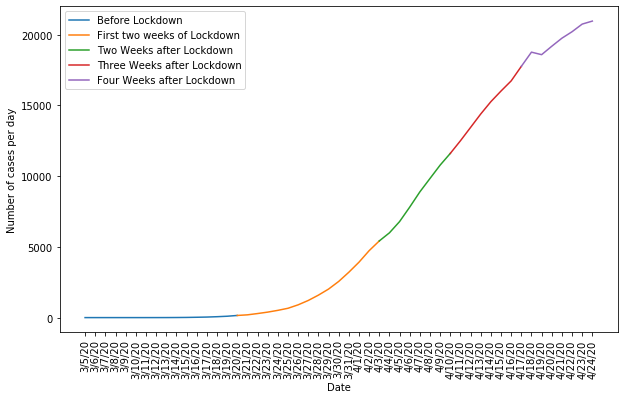

In [20]:
# plotting the number of deaths weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(before_ld,label = 'Before Lockdown')
plt.plot(lock_d1,label = 'First two weeks of Lockdown')
plt.plot(lock_d2,label = 'Two Weeks after Lockdown')
plt.plot(lock_d3, label = 'Three Weeks after Lockdown')
plt.plot(lock_d4, label = 'Four Weeks after Lockdown')

# lockdownCases = CAdata[CAdata['date']==lockdown_date]['new_deaths']
# plt.scatter(lockdown_date,0,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()

In [21]:
tstat, pvalue, ddof = ttest_ind(
                                before_ld_d,
                                lock_d1_d,
                                alternative="larger",
                                usevar="pooled"
)

In [22]:
print(ddof)

29.0


In [23]:
print(tstat)

-5.007041054253327


In [24]:
pvalue

0.9999875626681556

In [25]:
from scipy import stats
1 - stats.t.cdf(tstat, df=ddof)

0.9999875626681556

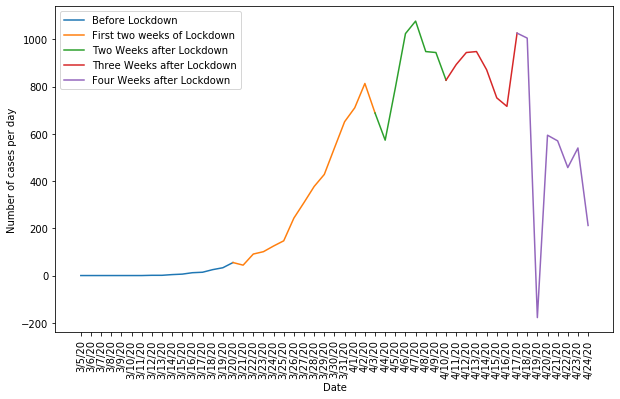

In [36]:
# plotting the number of deaths weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(before_ld_d,label = 'Before Lockdown')
plt.plot(lock_d1_d,label = 'First two weeks of Lockdown')
plt.plot(lock_d2_d,label = 'Two Weeks after Lockdown')
plt.plot(lock_d3_d, label = 'Three Weeks after Lockdown')
plt.plot(lock_d4_d, label = 'Four Weeks after Lockdown')

# lockdownCases = CAdata[CAdata['date']==lockdown_date]['new_deaths']
# plt.scatter(lockdown_date,0,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()

In [27]:
lock_d4_d

4/17/20       0.0
4/18/20    1005.0
4/19/20    -178.0
4/20/20     594.0
4/21/20     570.0
4/22/20     457.0
4/23/20     540.0
4/24/20     212.0
Name: Total, dtype: float64